In [1]:
#Importing initial useful library

import pandas as pd
import warnings

warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)


In [2]:
#Loading and viewing the dataset
df = pd.read_csv('test_center_transport.csv')
df.head()

,Cost,Time_Reliability,Safety_Score,Comfort_Level,Social_Acceptability,Legal_Risk,Travel_Time,Weather,Day_Type,Best_Option
0,122,9,4,8,5,2,114,Cloudy,Weekend,Family
1,455,1,2,8,4,2,108,Clear,Weekday,Family
2,368,9,6,2,8,0,10,Storm,Weekday,Cab
3,290,7,6,6,7,0,30,Rainy,Weekend,Cab
4,126,9,1,7,2,1,64,Clear,Weekend,Family


In [3]:
#Checking any null values in the dataset
df.isnull().sum()

Cost                    0
Time_Reliability        0
Safety_Score            0
Comfort_Level           0
Social_Acceptability    0
Legal_Risk              0
Travel_Time             0
Weather                 0
Day_Type                0
Best_Option             0
dtype: int64

In [4]:
#Checking any zero values in the dataset
(df==0).sum()

Cost                     0
Time_Reliability         0
Safety_Score             0
Comfort_Level            0
Social_Acceptability     0
Legal_Risk              49
Travel_Time              0
Weather                  0
Day_Type                 0
Best_Option              0
dtype: int64

In [5]:
#Checking any na values in the dataset
df.isna().sum()

Cost                    0
Time_Reliability        0
Safety_Score            0
Comfort_Level           0
Social_Acceptability    0
Legal_Risk              0
Travel_Time             0
Weather                 0
Day_Type                0
Best_Option             0
dtype: int64

In [6]:
#Separating the categorical and numerical features

categorical_cols = ['Weather','Day_Type']
numerical_cols =['Cost',
 'Time_Reliability',
 'Safety_Score',
 'Comfort_Level',
 'Social_Acceptability',
 'Legal_Risk',
 'Travel_Time']

In [7]:
#Viewing categorical cols
categorical_cols

['Weather', 'Day_Type']

In [8]:
#Viewing numerical cols
numerical_cols

['Cost',
 'Time_Reliability',
 'Safety_Score',
 'Comfort_Level',
 'Social_Acceptability',
 'Legal_Risk',
 'Travel_Time']

In [9]:
#Encoding part: OneHotEncoding- categorical

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_cols)
],remainder='passthrough')

df_ct = pd.DataFrame(ct.fit_transform(df))
df_ct.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,122,9,4,8,5,2,114,Family
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,455,1,2,8,4,2,108,Family
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,368,9,6,2,8,0,10,Cab
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,290,7,6,6,7,0,30,Cab
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,126,9,1,7,2,1,64,Family


In [10]:
#Preparing preprocessor pipeline for transformation of data
preprocessor = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_cols),
    ('num',StandardScaler(),numerical_cols)
])


In [11]:
preprocessor

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [12]:
# Defining the Predictor and Target Cols
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [13]:
#Label encoding the target feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [14]:
#Viewing the X features
X

,Cost,Time_Reliability,Safety_Score,Comfort_Level,Social_Acceptability,Legal_Risk,Travel_Time,Weather,Day_Type
0,122,9,4,8,5,2,114,Cloudy,Weekend
1,455,1,2,8,4,2,108,Clear,Weekday
2,368,9,6,2,8,0,10,Storm,Weekday
3,290,7,6,6,7,0,30,Rainy,Weekend
4,126,9,1,7,2,1,64,Clear,Weekend
...,...,...,...,...,...,...,...,...,...
115,299,8,9,10,8,2,65,Storm,Weekday
116,429,1,10,3,1,0,34,Storm,Festival
117,236,6,6,10,6,0,76,Clear,Festival
118,271,8,10,1,4,0,105,Storm,Weekend


In [15]:
#Splitting the dataset in 71:29
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.29, random_state = 42)
print(f"X_train.shape:{X_train.shape}\nX_test.shape:{X_test.shape}\ny_train.shape:{y_train.shape}\ny_test.shape:{y_test.shape}")

X_train.shape:(85, 9)
X_test.shape:(35, 9)
y_train.shape:(85,)
y_test.shape:(35,)


In [16]:
#Making sure missing cols left in the X_train
print("Missing Categorical:",set(categorical_cols) - set(X_train.columns))
print("Missing Numerical: ",set(numerical_cols) - set(X_train.columns))

Missing Categorical: set()
Missing Numerical:  set()


In [17]:
#Transforming the features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [18]:
#Training the models: Logistic Regression, Decision TreeClassifier,RandomForestClassifier,SVM,and XGBoost
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from  xgboost import XGBClassifier

lr = LogisticRegression(max_iter=1000,class_weight='balanced',solver ='lbfgs', random_state=42)
dt = DecisionTreeClassifier(
    max_depth=10,
    random_state=42,criterion='entropy',ccp_alpha=0.02)
rf = RandomForestClassifier(max_depth=15,n_estimators=100,class_weight='balanced',min_samples_split=5,random_state=42)
svm= SVC(class_weight='balanced',probability=True,random_state=42)
xg = XGBClassifier(n_estimators=200,eval_metric='mlogloss',max_depth=6,learning_rate=0.1,label_encoder=False,random_state=42)

In [19]:
#Training logistic regression model
lr.fit(X_train_transformed, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
#Training  Decision Tree classifier model
dt.fit(X_train_transformed, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
#Training  Randomforestclassifier model
rf.fit(X_train_transformed, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#Training SVM model
svm.fit(X_train_transformed, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [23]:
#Training XGBoost model
xg.fit(X_train_transformed, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [24]:
#Predicting the output from the models
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)
y_pred_svm = svm.predict(X_test_transformed)
y_pred_xg = xg.predict(X_test_transformed)

In [25]:
#Predicting the probability from the models
y_prob_lr = lr.predict_proba(X_test_transformed)
y_prob_dt = dt.predict_proba(X_test_transformed)
y_prob_rf = rf.predict_proba(X_test_transformed)
y_prob_svm = svm.predict_proba(X_test_transformed)
y_prob_xg = xg.predict_proba(X_test_transformed)

In [26]:
#Evaluation function for performance metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


def evaluate_model(name,y_true,y_pred,y_pred_proba):
    print(f"\n {name} Evaluation: ")
    print(f"Classification Report:{classification_report(y_true,y_pred,zero_division=0)}")

    print("Accuracy Score:" ,accuracy_score(y_true, y_pred))
    print(f"F1 Score(Weighted): {f1_score(y_true, y_pred,average='weighted')}\n")

    try:
        if len(set(y_true)) > 2:
            roc_auc = roc_auc_score(y_true,y_pred_proba,multi_class='ovr',average='macro')

        else:
            roc_auc = roc_auc_score(y_true,y_pred_proba)
        print(f"ROC AUC Score(macro,ovr): {roc_auc}\n")
    except ValueError as e:
        print("ROC AUC can't be calculated",e)


In [27]:
#Evaluating scores fot Logistic Regression
evaluate_model('Logistic Regression',y_test,y_pred_lr,y_prob_lr)


 Logistic Regression Evaluation: 
Classification Report:              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.83      0.56      0.67        18
           2       0.46      0.55      0.50        11

    accuracy                           0.51        35
   macro avg       0.50      0.48      0.47        35
weighted avg       0.61      0.51      0.54        35

Accuracy Score: 0.5142857142857142
F1 Score(Weighted): 0.5428571428571428

ROC AUC Score(macro,ovr): 0.6787089966603151



In [28]:
# Evaluating scores for Decision Tree Classifier
evaluate_model('Decision Tree Classifier',y_test,y_pred_dt,y_prob_dt)


 Decision Tree Classifier Evaluation: 
Classification Report:              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.81      0.72      0.76        18
           2       0.54      0.64      0.58        11

    accuracy                           0.66        35
   macro avg       0.62      0.62      0.62        35
weighted avg       0.67      0.66      0.66        35

Accuracy Score: 0.6571428571428571
F1 Score(Weighted): 0.6623249299719889

ROC AUC Score(macro,ovr): 0.7214444990814158



In [29]:
#Evaluation scores for Random Forest Classifier
evaluate_model('Random Forest Classifier',y_test,y_pred_rf,y_prob_rf)


 Random Forest Classifier Evaluation: 
Classification Report:              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.68      0.72      0.70        18
           2       0.60      0.55      0.57        11

    accuracy                           0.60        35
   macro avg       0.54      0.53      0.54        35
weighted avg       0.60      0.60      0.60        35

Accuracy Score: 0.6
F1 Score(Weighted): 0.5981246552675124

ROC AUC Score(macro,ovr): 0.741714815497777



In [30]:
#Evaluation scores for SVM
evaluate_model('SVM',y_test,y_pred_svm,y_prob_svm)


 SVM Evaluation: 
Classification Report:              precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.64      0.50      0.56        18
           2       0.58      0.64      0.61        11

    accuracy                           0.51        35
   macro avg       0.48      0.49      0.48        35
weighted avg       0.55      0.51      0.53        35

Accuracy Score: 0.5142857142857142
F1 Score(Weighted): 0.526304347826087

ROC AUC Score(macro,ovr): 0.6826283456608001



In [31]:
#Evaluation scores for XGBoost
evaluate_model('XGBOOST Classifier',y_test,y_pred_xg,y_prob_xg)


 XGBOOST Classifier Evaluation: 
Classification Report:              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.80      0.67      0.73        18
           2       0.57      0.73      0.64        11

    accuracy                           0.63        35
   macro avg       0.57      0.58      0.57        35
weighted avg       0.65      0.63      0.63        35

Accuracy Score: 0.6285714285714286
F1 Score(Weighted): 0.6323116883116884

ROC AUC Score(macro,ovr): 0.780950990636589



In [32]:
#Hyperparameter tuning for the best model

from sklearn.model_selection import StratifiedKFold,GridSearchCV

#Defining startified k-fold
skf = StratifiedKFold(n_splits=5,shuffle =True, random_state=42)

#Defining models and parameter grids
param_grids = {
    'Logistic Regression':{
        'model':LogisticRegression(max_iter=1000,multi_class='auto'),
        'params':{
            'C':[0.01,0.1,1,10],
            'class_weight':['balanced','balanced'],
            'solver':['lbfgs']
        }
    },
    'Decision Tree Classifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth':[None,5,10,20],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,5,10],
        }
    },
    'Random Forest Classifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,100,200],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,5,10],
            'max_depth':[None,5,10],
        }
    },
    'SVM':{
        'model':SVC(probability=True),
        'params':{
            'C':[0.1,1,10],
            'class_weight':['balanced','balanced'],
            'kernel':['linear','rbf','poly'],

        }
    },
    'XGBOOST Classifier':{
        'model':XGBClassifier(eval_metric='mlogloss'),
        'params':{
            'n_estimators':[50,100,200],
            'max_depth':[3,5,7],
            'learning_rate':[0.01,0.1,0.2],
            'tree_method':['hist']
        }
    }
}

In [33]:
#Scoring the best model

best_models ={}
for name,mp in param_grids.items():
    print(f"\n Tuning {name}....")
    grid = GridSearchCV(mp['model'],mp['params'],cv=skf,scoring='f1_weighted',n_jobs=-1)
    grid.fit(X_train_transformed,y_train)
    print(f"Best model: {grid.best_params_}")

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    y_prob = best_model.predict_proba(X_test_transformed)

    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='weighted')
    roc = roc_auc_score(y_test,y_prob,multi_class='ovr',average='macro')

    print(f"{name} Accuracy: {acc:.4f}\t,F1: {f1:.4f}\t\t,ROC AUC :{roc:.4f}")
    print(f"Classification Report:{classification_report(y_test,y_pred,zero_division=0)}")
    best_models[name] = best_model


 Tuning Logistic Regression....
Best model: {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.4857	,F1: 0.5113		,ROC AUC :0.6644
Classification Report:              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.77      0.56      0.65        18
           2       0.42      0.45      0.43        11

    accuracy                           0.49        35
   macro avg       0.46      0.45      0.44        35
weighted avg       0.56      0.49      0.51        35


 Tuning Decision Tree Classifier....
Best model: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
Decision Tree Classifier Accuracy: 0.6571	,F1: 0.6619		,ROC AUC :0.7011
Classification Report:              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.88      0.83      0.86        18
           2       0.50      0.55      0.52        11



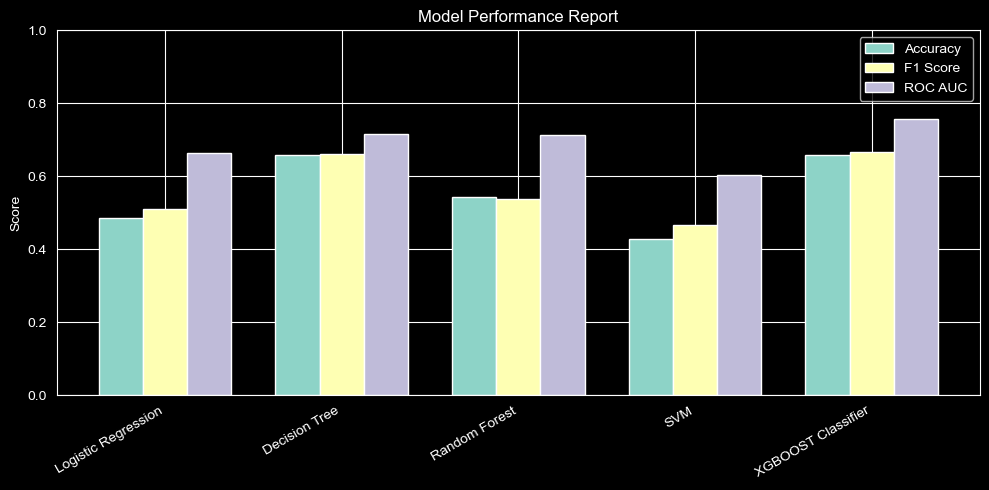

In [77]:
#Model Performance Comparison Report
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('dark_background')
colors ={
    'Logistic Regression':'#FF6F61',
    'Decision Tree Classifier':'#6B5B95',
    'Random Forest Classifier':'#88B04B',
    'SVM':'#F7CAC9',
    'XGBOOST Classifier':'#92A8D1',
}
#Grouped Bar Chart of metrics
models = ['Logistic Regression','Decision Tree','Random Forest','SVM','XGBOOST Classifier']
accuracies = [0.4857, 0.6571, 0.5429, 0.4286, 0.6571]
f1_scores = [0.5113,0.6611,0.5390,0.4677,0.6676	]
roc_auc_scores = [0.6644,0.7156,0.7125,0.6043,0.7582]

x = np.arange(len(models))
width = 0.25
plt.figure(figsize=(10,5))
plt.bar(x - width,accuracies,width,label='Accuracy')
plt.bar(x,f1_scores,width,label='F1 Score')
plt.bar(x + width,roc_auc_scores,width,label='ROC AUC')

plt.xticks(x,models,rotation=30,ha='right')
plt.ylabel('Score')
plt.ylim(0,1)
plt.title("Model Performance Report")
plt.legend()
plt.tight_layout()

plt.show()

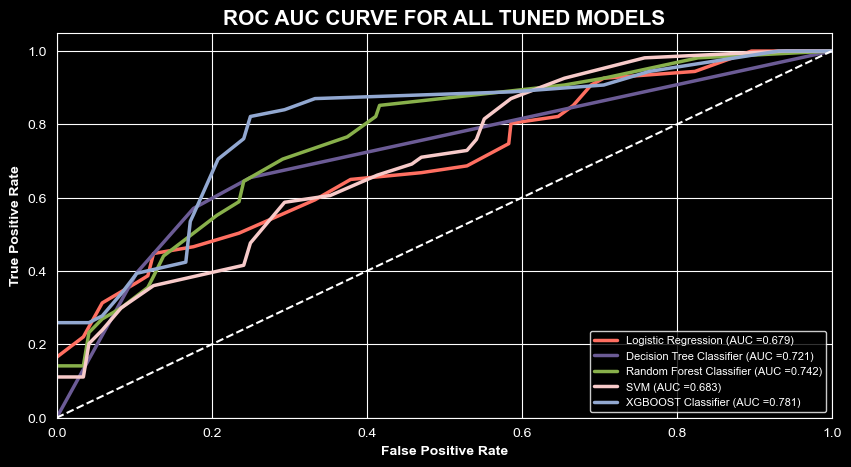

In [76]:
#ROC CURVES FOR ALL MODELS


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc


models_stratified = {
    'Logistic Regression':lr,
    'Decision Tree Classifier':dt,
    'Random Forest Classifier':rf,
    'SVM':svm,
    'XGBOOST Classifier':xg,

}


plt.style.use('dark_background')
colors ={
    'Logistic Regression':'#FF6F61',
    'Decision Tree Classifier':'#6B5B95',
    'Random Forest Classifier':'#88B04B',
    'SVM':'#F7CAC9',
    'XGBOOST Classifier':'#92A8D1',
}

#binarize the target for roc
y_test_bin = label_binarize(y_test,classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10,5))
for name, model in models_stratified.items():
    #predicting probabilities
    y_score = model.predict_proba(X_test_transformed)
    #Computing macro average roc auc curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Average roc across classes
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    plt.plot(all_fpr, mean_tpr,color=colors[name],lw = 2.5,label =f"{name} (AUC ={np.mean(list(roc_auc.values())):.3f})")

#plot reference line
plt.plot([0,1],[0,1],'w--',lw=1.5)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize=10,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=10,fontweight='bold')
plt.title("ROC AUC CURVE FOR ALL TUNED MODELS",fontsize=15,fontweight='bold')
plt.legend(fontsize=8,loc='lower right',frameon=True,facecolor='black',edgecolor='white')

plt.show()

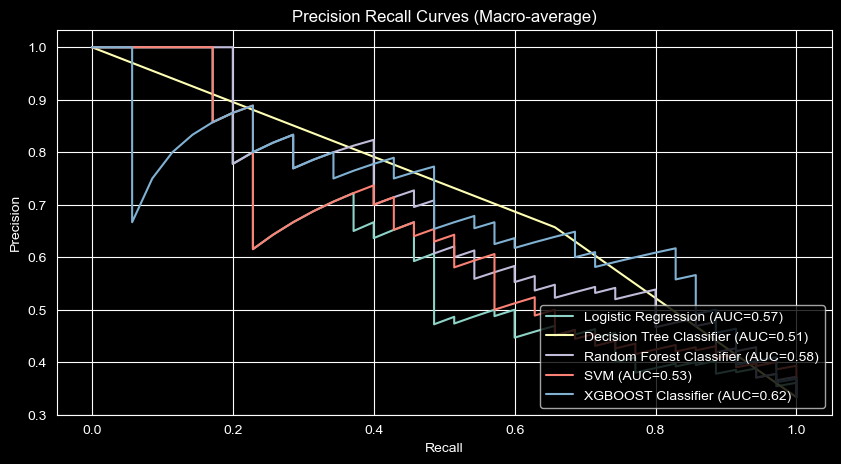

In [75]:
#Precision Recall Curves
from sklearn.metrics import precision_recall_curve,average_precision_score

plt.figure(figsize=(10,5))
for name,model in models_stratified.items():
    y_score = model.predict_proba(X_test_transformed)
    precision,recall, _ = precision_recall_curve(y_test_bin.ravel(),y_score.ravel())
    avg_prec = average_precision_score(y_test_bin,y_score,average ="macro")
    plt.plot(recall,precision,label=f"{name} (AUC={avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curves (Macro-average)")
plt.legend(loc = 'lower right')

plt.show()

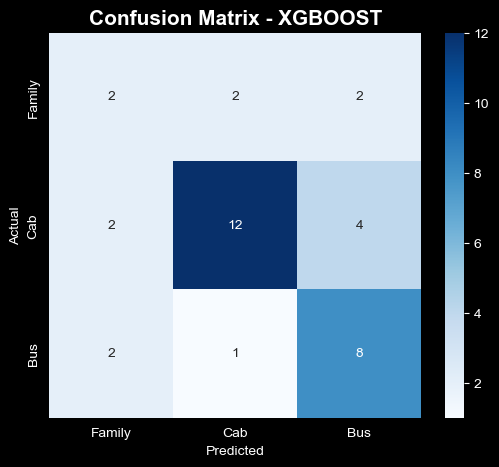

In [74]:
#Confusion matrix heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_xg)
class_names =['Family','Cab','Bus']

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBOOST",fontsize=15,fontweight='bold')

plt.show()

In [40]:
#Prediction Sample
sample_index =32
sample_data = X_test_transformed[sample_index].reshape(1,-1)

#predicting classes
predicted_class = xg.predict(sample_data)[0]
predicted_prob = xg.predict_proba(sample_data)[0]

#mapping numeric prediction to actual class name
predicted_label = class_names[predicted_class]


print(f"Sample Index:{sample_index}")
print(f"Predicted Class:{predicted_class}")
print(f"Predicted Probability:")
for cls, prob in zip(class_names,predicted_prob):
    print(f"{cls}:{prob:.4f}")

Sample Index:32
Predicted Class:2
Predicted Probability:
Family:0.0215
Cab:0.0091
Bus:0.9693


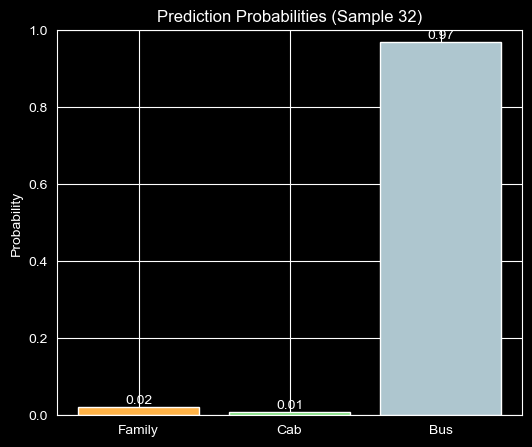

In [41]:
# Probability Bar plot for model's performance based on the sample index: 32
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
bars = plt.bar(class_names,predicted_prob,color =['#FFB347',  '#77DD77',  '#AEC6Cf'])
plt.ylabel("Probability")
plt.ylim(0,1)
plt.title(f"Prediction Probabilities (Sample {sample_index})")

#Adding probability levels above bars
for bar,prob in zip(bars,predicted_prob):
    plt.text(bar.get_x() + bar.get_width()/2 , bar.get_height(),
             f"{prob:.2f}",ha='center',va='bottom',fontsize=10)

plt.show()


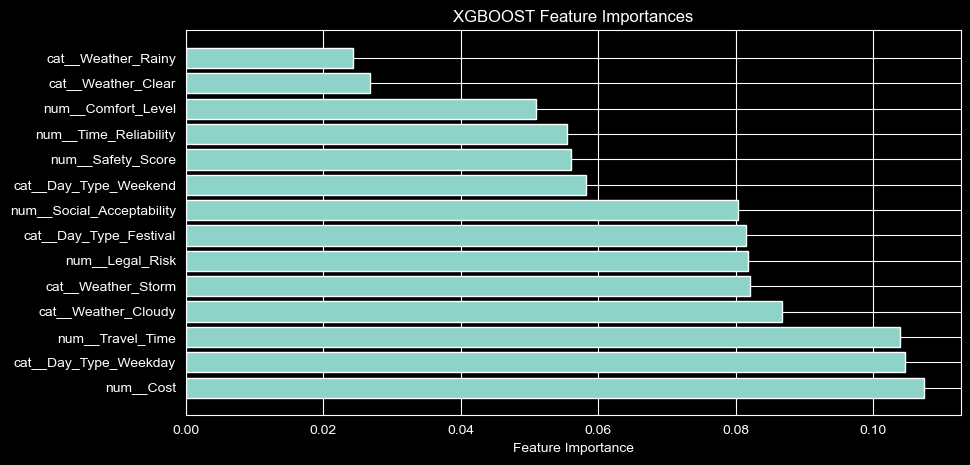

In [73]:
#Feature Importance Plot


importances = xg.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,5))
plt.barh(np.array(feature_names)[sorted_idx],importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBOOST Feature Importances")

plt.show()

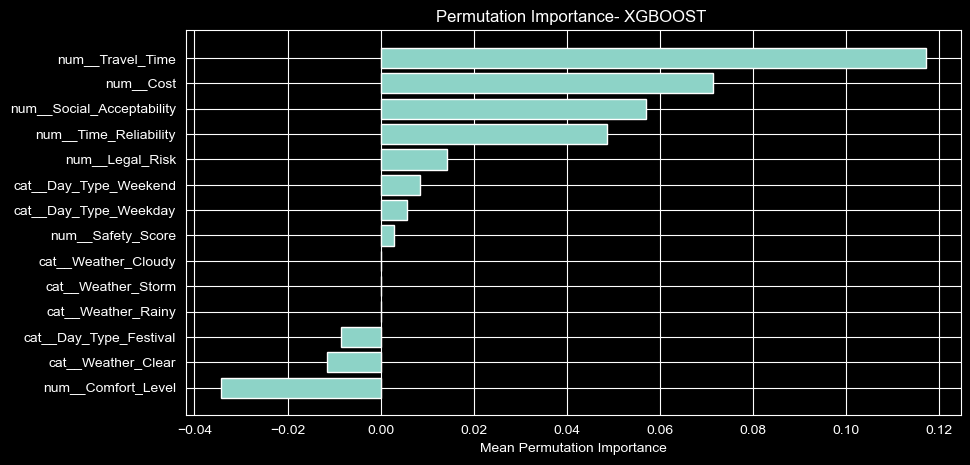

In [43]:
#Permutation Importance -Global Explainability

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    xg,X_test_transformed,y_test, n_repeats=10,random_state=42
)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10,5))
plt.barh(np.array(feature_names)[sorted_idx],perm_importance.importances_mean[sorted_idx])
plt.xlabel("Mean Permutation Importance")
plt.title("Permutation Importance- XGBOOST ")
plt.show()

In [44]:
top_indices = np.argsort(importances)[::-1]
top_features = [feature_names[i] for i in top_indices]

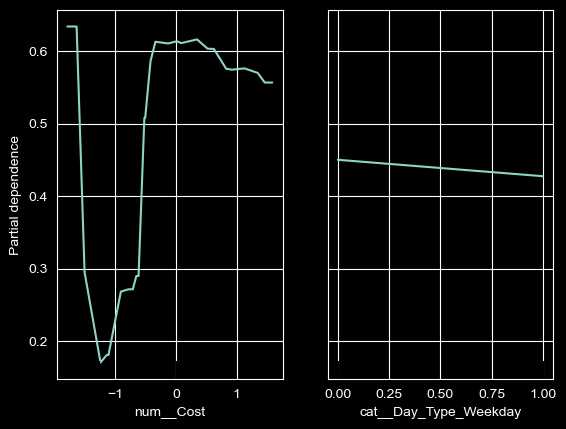

In [72]:
#PDP plot for Cab class
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    xg,X_test_transformed,
    features =[top_features[0], top_features[1]],
    feature_names=feature_names,
    target =1     # class index:0 - Family, 1-Cab, 2-Bus
)



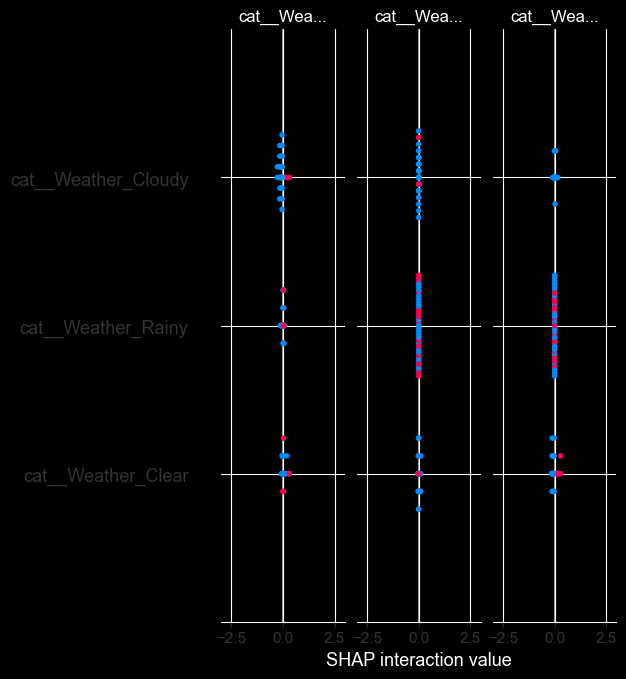

In [71]:
#SHAP Summary plot combined with all the classes:Cab, Family, and Bus
import shap

explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values[:,:], X_test_transformed, feature_names=feature_names)



Dependence Plot for Family


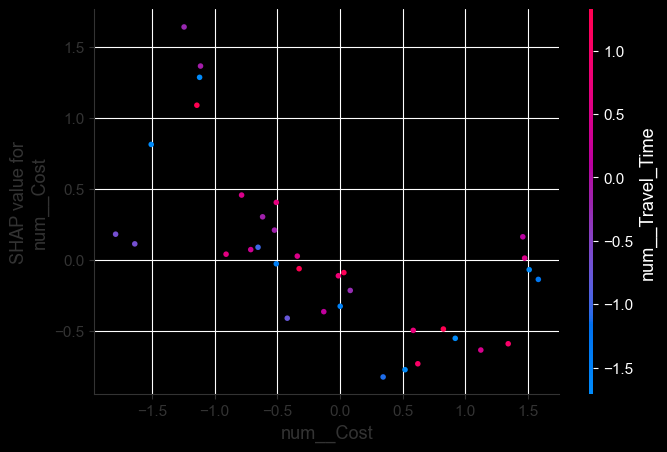

Dependence Plot for Cab


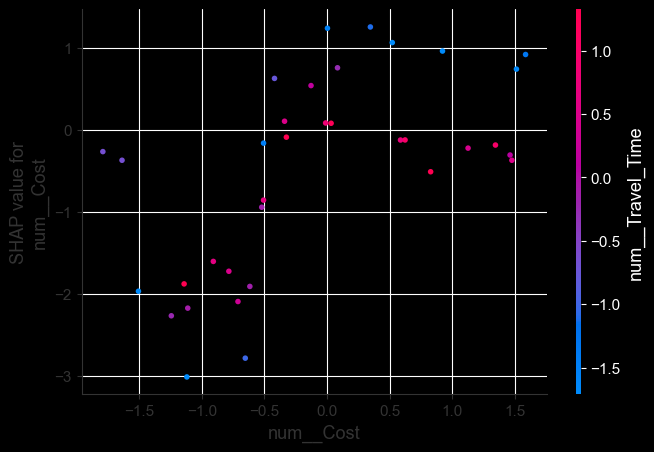

Dependence Plot for Bus


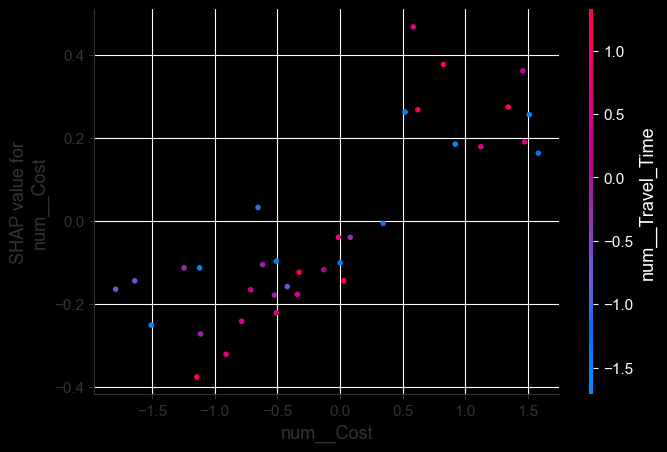

In [80]:
#Dependence plots

for class_idx,class_name in enumerate(class_names):
    print(f"Dependence Plot for {class_name}")
    shap.dependence_plot(
        'num__Cost',
        shap_values[:,:,class_idx],
        X_test_transformed,
        feature_names=feature_names
    )



Expalining sample 0 for Predicted Class Cab


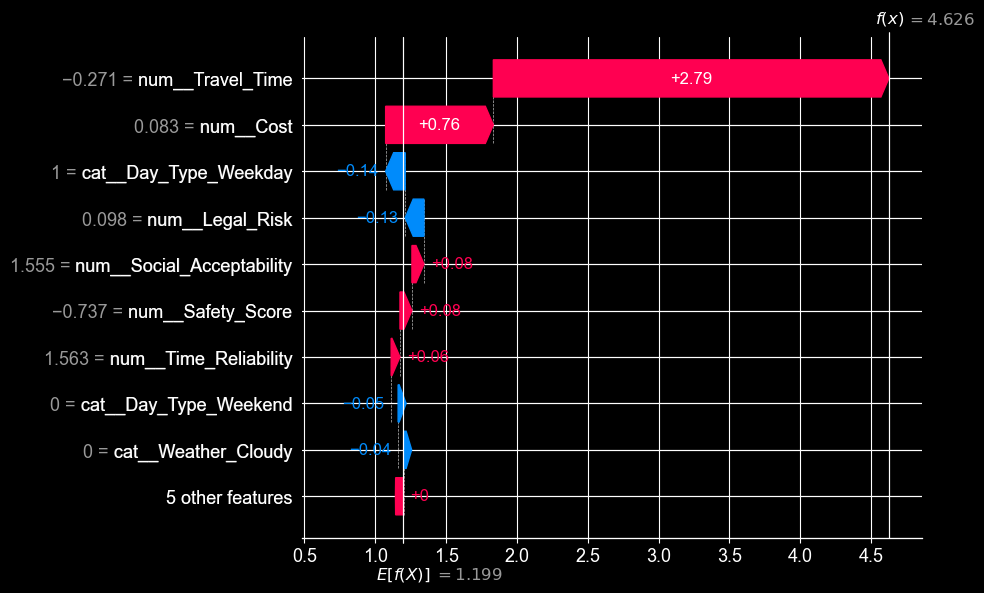

Expalining sample 1 for Predicted Class Family


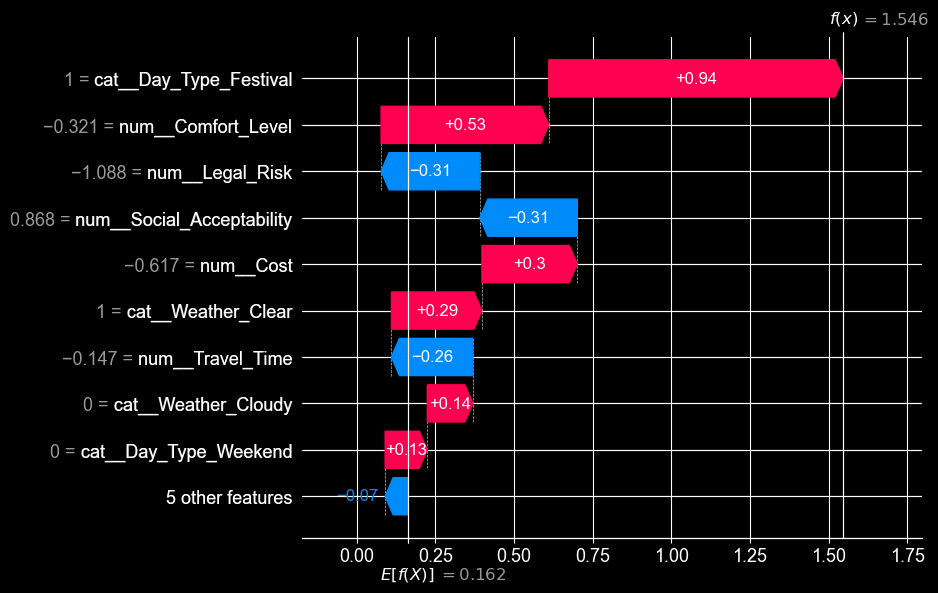

Expalining sample 6 for Predicted Class Bus


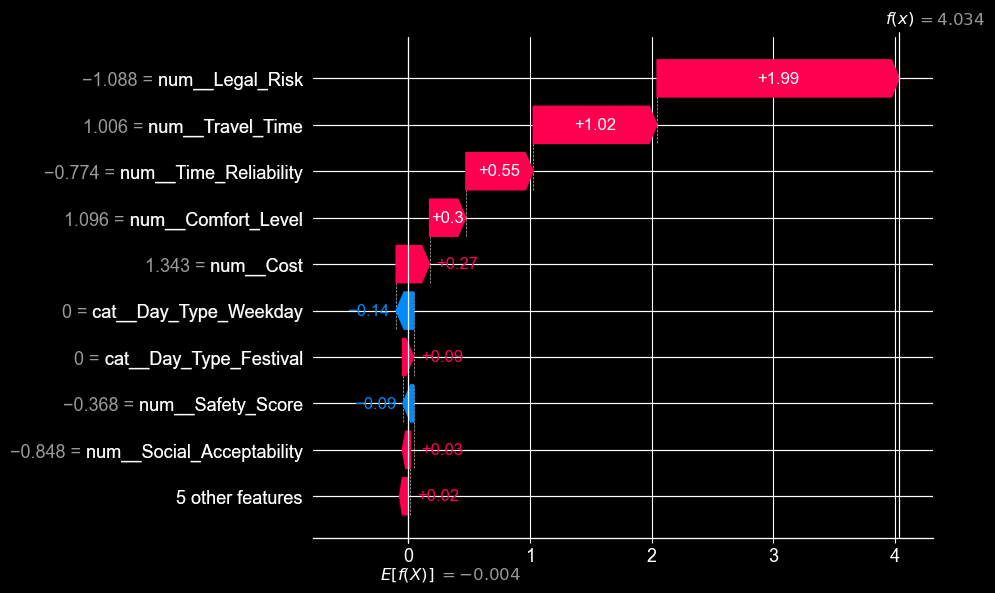

In [48]:
#Model Explainability
import shap
import numpy as np


#Getting predictions for all test samples
pred_prob_all = model.predict_proba(X_test_transformed)
pred_class_idxs = np.argmax(pred_prob_all, axis=1)

#Tracking the classes explained before
explained_classes = set()


for i,pred_idx in enumerate(pred_class_idxs):
    class_name = class_names[pred_idx]

    if class_name not in explained_classes:
        explained_classes.add(class_name)

        print(f"Expalining sample {i} for Predicted Class {class_name}")

        shap.waterfall_plot(
            shap.Explanation(
                values = shap_values[i, :, pred_idx],
                base_values = explainer.expected_value[pred_idx],
                data = X_test_transformed[i],
                feature_names = feature_names,

            ),
        )
    # Stopping criteria
    if len(explained_classes) == len(class_names):
        break



In [58]:
#Statistical tests for F1 score  between XGB vs DT
from scipy.stats  import ttest_rel
from sklearn.model_selection import StratifiedKFold,cross_val_score

skf2 = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
xgb_cv = cross_val_score(xg,X_train_transformed,y_train,cv=skf2,scoring='f1_macro')
dt_cv = cross_val_score(dt,X_train_transformed,y_train,cv=skf2,scoring='f1_macro')


t_stat_f1,p_val_f1 = ttest_rel(xgb_cv,dt_cv)

print("Paired T-test(XGB vs DT)")
print("T-Statistic:",t_stat_f1)
print("P-Value:",p_val_f1)
print("XGB Mean F1:",np.mean(xgb_cv),"DT Mean F1:",np.mean(dt_cv))
print()

Paired T-test(XGB vs DT)
T-Statistic: 0.7647535071717969
P-Value: 0.4870443425579581
XGB Mean F1: 0.5330973601561836 DT Mean F1: 0.5072802796332208



In [59]:
#ROC_AUC comparision between xgb vs Random forest
xgb_auc = cross_val_score(xg,X_train_transformed,y_train,cv=skf2,scoring='roc_auc_ovr')
rf_auc = cross_val_score(rf,X_train_transformed,y_train,cv=skf2,scoring='roc_auc_ovr')

t_stat_auc,p_val_auc = ttest_rel(xgb_auc,rf_auc)
print("Paired T-Test(XGBoost vs Random Forest) - ROC AUC(OVR)")
print("T-Statistic:",t_stat_auc)
print("P-Value:",p_val_auc)
print("XGB mean AUC:",np.mean(xgb_auc),  "RF mean AUC:",np.mean(rf_auc))

Paired T-Test(XGBoost vs Random Forest) - ROC AUC(OVR)
T-Statistic: 4.74192399807658
P-Value: 0.009024396471140287
XGB mean AUC: 0.7637403337403337 RF mean AUC: 0.6744627594627595


In [60]:
#McNemar's test on set predictions between XGB vs Decision tree
from statsmodels.stats.contingency_tables import mcnemar
#building 2*2 cotigency table
b = np.sum((y_pred_dt == y_test) & (y_pred_xg != y_test))
c = np.sum((y_pred_dt != y_test) & (y_pred_xg == y_test))
table = [[ 0,b],
         [c,0]]

result = mcnemar(table,exact=False,correction=True)

print("\n McNemar's Test (XGB vs DT)")
print("b (DT Correct,XGB Wrong):",b)
print("c (XGB Correct,DT Wrong):",c)
print("Statistic:",result.statistic,'p-value',result.pvalue)


 McNemar's Test (XGB vs DT)
b (DT Correct,XGB Wrong): 3
c (XGB Correct,DT Wrong): 2
Statistic: 0.0 p-value 1.0


In [61]:
#McNemar's test on set predictions between XGB vs Random forest
from statsmodels.stats.contingency_tables import mcnemar
#building 2*2 cotigency table
b = np.sum((y_pred_rf == y_test) & (y_pred_xg != y_test))
c = np.sum((y_pred_rf != y_test) & (y_pred_xg == y_test))
table = [[ 0,b],
         [c,0]]

result = mcnemar(table,exact=False,correction=True)

print("\n McNemar's Test (XGB vs RF)")
print("b (RF Correct,XGB Wrong):",b)
print("c (XGB Correct,RF Wrong):",c)
print("Statistic:",result.statistic,'p-value',result.pvalue)


 McNemar's Test (XGB vs RF)
b (RF Correct,XGB Wrong): 4
c (XGB Correct,RF Wrong): 5
Statistic: 0.0 p-value 1.0
